# Chapter 15 General Linear Least-Squares and Nonlinear Regression

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## 15.1 Polynomial Regression

$$ y = a_0 x^2 + a_1 x + a_2 + e $$
$$ S_r = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - (a_0 x^2 + a_1 x + a_2))^2$$

Take the derivative with respect to $a_0, a_1, a_2$.

$$ \begin{equation} \begin{split}
\frac{\partial S_r}{\partial a_2} &= -2 \sum (y_i - a_2 - a_1 x_i - a_0 x_i^2 ) \\
\frac{\partial S_r}{\partial a_1} &= -2 \sum x_i (y_i - a_2 - a_1 x_i - a_0 x_i^2 ) \\
\frac{\partial S_r}{\partial a_0} &= -2 \sum x_i^2 (y_i - a_2 - a_1 x_i - a_0 x_i^2 ) \\
\end{split} \end{equation} $$

$$ \begin{equation} \begin{split}
         n a_2 +     \sum x_i a_1 + \sum x_i^2 a_0 & = \sum y_i \\
  \sum x_i a_2 +   \sum x_i^2 a_1 + \sum x_i^3 a_0 & = \sum x_i y_i \\
\sum x_i^2 a_2 +   \sum x_i^3 a_1 + \sum x_i^4 a_0 & = \sum x_i^2 y_i 
\end{split} \end{equation} $$

$$ \begin{bmatrix}
         n     &     \sum x_i   &  \sum x_i^2  \\
   \sum x_i    &   \sum x_i^2   &  \sum x_i^3  \\ 
   \sum x_i^2  &   \sum x_i^3   &  \sum x_i^4 
\end{bmatrix} 
\begin{bmatrix}
   a_2 \\ a_1 \\ a_0
\end{bmatrix} = 
\begin{bmatrix}
   \sum y_i \\ \sum x_i y_i \\ \sum x_i^2 y_i
\end{bmatrix} $$

$$ \begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
  & \cdots & \\
1 & x_n & x_n^2 \\
\end{bmatrix} 
\begin{bmatrix}
a_2 \\
a_1 \\
a_0 \\
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
\cdots \\
y_n \\
\end{bmatrix}$$

$$ Z a = y$$
$$ Z^T Z a = Z^T y$$

In [5]:
xdata = np.arange(6)
ydata = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
Z = np.c_[xdata**2, xdata, np.ones_like(xdata)]
a = np.linalg.solve(np.dot(Z.T, Z), np.dot(Z.T, ydata))
St = np.sum((ydata - ydata.mean())**2)
Sr = np.sum((ydata - np.dot(Z, a))**2)
r2 = 1 - Sr/St
print(a, r2)

[1.86071429 2.35928571 2.47857143] 0.9985093572984047


[0.07592593 1.29126984 3.3994709  2.25079365] 0.9986579832816925


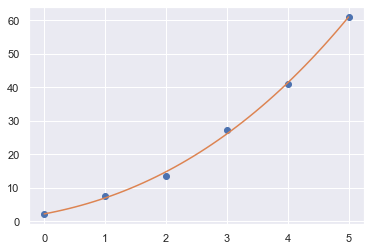

In [13]:
xdata = np.arange(6)
ydata = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
a = np.polyfit(xdata, ydata, 3)
St = np.sum((ydata - ydata.mean())**2)
Sr = np.sum((ydata - np.polyval(a, xdata))**2)
r2 = 1 - Sr/St
print(a, r2)
xx = np.linspace(0, 5)
yy = np.polyval(a, xx)
plt.plot(xdata, ydata, 'o')
plt.plot(xx, yy);

## Multiple Linear Regression
$$ y = a_0 + a_1 x_1 + a_2 x_2 $$

### Example 15.2  

numpy.linalg.lstsq(a, b, rcond='warn')
- Return the least-squares solution to a linear matrix equation.
- Computes the vector x that approximatively solves the equation a @ x = b. 
- If a is square and of full rank, then x (but for round-off error) is the “exact” solution of the equation. 
- Else, x minimizes the Euclidean 2-norm || b - a x ||.

In [14]:
x1 = np.array([0, 2, 2.5, 1, 4, 7])
x2 = np.array([0, 1, 2, 3, 6, 2])
y = np.array([5, 10, 9, 0, 3, 27])

Z = np.c_[np.ones_like(y), x1, x2]
a, res, rank, s = np.linalg.lstsq(Z, y, rcond=None)
# a = np.linalg.solve(np.dot(Z.T, Z), np.dot(Z.T, y))

St = np.sum((y - y.mean())**2)
Sr = np.sum((y - np.dot(Z, a))**2)
r2 = 1 - Sr/St

print(a, r2)

[ 5.  4. -3.] 1.0


## General Linear Least Square Method
$$ y = a_0 z_0 + a_1 z_1 + a_2 z_2 + \cdots + a_m z_m$$
$$ \bar{y} = Z \  \bar{a} $$
$$ Z^T Z \ \bar{a} = Z^T \ \bar{y}$$

## Nonlinear Regression

**scipy.optimize.leastsq**(func, x0)

- Minimize the sum of squares of a set of equations.
- x = arg min(sum(func(y)**2))
         
### Example 15.5

[0.2741373420132246, 1.9841762557640106] 0.8088181209722788
[2.53845169 1.43584822] 0.8768980627469589


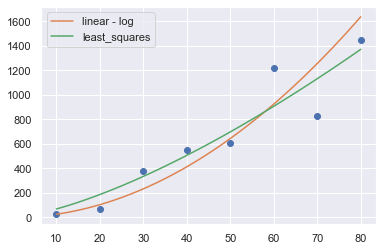

In [15]:
xdata = np.arange(10, 81, 10)
ydata = np.array([25, 70, 380, 550, 610, 1220, 830, 1450])
plt.plot(xdata, ydata, 'o')

# logarithm linear fit
a = np.polyfit(np.log10(xdata), np.log10(ydata), 1)
alpha = 10**a[1]
beta = a[0]
St = np.sum((ydata - ydata.mean())**2)
Sr = np.sum((ydata - alpha*xdata**beta)**2)
r2 = 1 - Sr/St
print([alpha, beta], r2)

xx = np.linspace(10, 80)
yy = alpha*xx**beta
plt.plot(xx, yy, label='linear - log')

# nonlinear regression
from scipy.optimize import leastsq
def fun(a, x, y):
    return a[0]*x**a[1] - y
# res = leastsq(fun, [1, 1], (x, y))
res = leastsq(lambda a: fun(a, xdata, ydata), [1, 1])
a = res[0]
Sr = np.sum((ydata - a[0]*xdata**a[1])**2)
r2 = 1 - Sr/St
print(a, r2)
yy = a[0]*xx**a[1]
plt.plot(xx, yy, label='least_squares')

plt.legend();

## 15.6 Case Study : Fitting Experimental Data

$$ K = a_0 U^{a_1} H^{a_2} $$
$$ \log K = \log a_0 + a_1 \log U + a_2 \log H $$

[3.76942259 1.5620453  0.50742446]
50.704541169711305


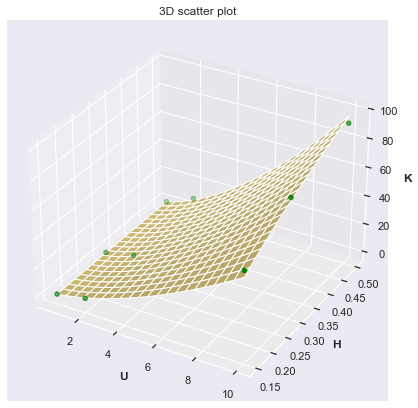

In [16]:
U = np.array([ 0.5,    2,   10,  0.5,   2,  10,  0.5,    2,  10])
H = np.array([0.15, 0.15, 0.15,  0.3, 0.3, 0.3,  0.5,  0.5, 0.5])
K = np.array([0.48,  3.9,   57, 0.85,   5,  77,  0.8,    9,  92])
Z = np.c_[np.ones(len(U)), np.log10(U), np.log10(H)]
a = np.linalg.solve(Z.T @ Z, Z.T @ np.log10(K))
a[0] = 10**a[0]
print(a)
Sr = np.sum((K - a[0]*U**a[1]*H**a[2])**2)
print(Sr)

from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(U, H, K, color = "green")
plt.title("3D scatter plot")
ax.set_xlabel('U', fontweight ='bold') 
ax.set_ylabel('H', fontweight ='bold') 
ax.set_zlabel('K', fontweight ='bold')

# U1, H1 = np.meshgrid(np.array([ 0.5, 2, 10]), np.array([0.15, 0.3, 0.5])) 
# ax.plot_surface(U1, H1, K.reshape((3,3)), color='y')

U2 = np.linspace(0.5, 10, 21)
H2 = np.linspace(0.15, 0.5, 21)
U2, H2 = np.meshgrid(U2, H2)
K2 = a[0]*U2**a[1]*H2**a[2]
ax.plot_surface(U2, H2, K2, color='y')

plt.show()